In [204]:
#Importiamo le librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#Leggiamo il dataset
dataset = pd.read_csv('smart_mobility_dataset.csv')

dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Low


# SMOTE

In [205]:
# Elimina la colonna Accident_Report
dataset= dataset.drop(columns=['Accident_Report'])
dataset.head()
# cancellazione delle feature inutili per i nostri obiettivi
dataset=dataset.drop(columns=['Sentiment_Score', 'Ride_Sharing_Demand', 'Parking_Availability'], axis=1)
dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,364.466342,16.801459,Low


In [206]:
# Inizializziamo il LabelEncoder
encoder = LabelEncoder()

# Applichiamo il Label Encoding alle colonne categoriche
# codifica delle categotie in ordine alfabetico ma a noi non va bene per Traffic_Condition

# Mappatura personalizzata per Traffic_Condition
traffic_condition_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Applichiamo il mapping
dataset['Traffic_Condition'] = dataset['Traffic_Condition'].map(traffic_condition_mapping)

# Applichiamo il Label Encoding per le altre colonne
columns_to_encode = ['Traffic_Light_State', 'Weather_Condition']
for col in columns_to_encode:
    dataset[col] = encoder.fit_transform(dataset[col])

dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,2,0,450.760055,19.574337,2
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,0,0,321.800341,5.385554,2
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,0,2,231.152655,10.277477,2
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,1,1,410.384292,29.243279,2
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,1,3,364.466342,16.801459,0


In [207]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

def classify_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

dataset['Timestamp'] = dataset['Timestamp'].dt.hour.apply(classify_time)
dataset['Timestamp'] = encoder.fit_transform(dataset['Timestamp'])
dataset.rename(columns={'Timestamp': 'Time_of_Day'}, inplace=True)
dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,3,40.842275,-73.703149,205,49.893435,82.652780,2,0,450.760055,19.574337,2
1,3,40.831119,-73.987354,202,22.383965,45.829298,0,0,321.800341,5.385554,2
2,3,40.819549,-73.732462,252,46.889699,82.772465,0,2,231.152655,10.277477,2
3,3,40.725849,-73.980134,37,5.730536,37.695567,1,1,410.384292,29.243279,2
4,3,40.813265,-73.961631,64,61.348034,22.313358,1,3,364.466342,16.801459,0


In [208]:
df_cong = dataset[['Vehicle_Count', 'Road_Occupancy_%']].copy()

# Normalizziamo dei dati di congestione
scaler = MinMaxScaler()
df_cong[['Vehicle_Count_norm', 'Road_Occupancy_norm']] = scaler.fit_transform(df_cong)

#calcolo dell'indice di congestione
dataset['Congestion_Index'] = 0.4 * df_cong['Vehicle_Count_norm'] + 0.6 * df_cong['Road_Occupancy_norm']
dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,Congestion_Index
0,3,40.842275,-73.703149,205,49.893435,82.652780,2,0,450.760055,19.574337,2,0.754243
1,3,40.831119,-73.987354,202,22.383965,45.829298,0,0,321.800341,5.385554,2,0.504586
2,3,40.819549,-73.732462,252,46.889699,82.772465,0,2,231.152655,10.277477,2,0.820093
3,3,40.725849,-73.980134,37,5.730536,37.695567,1,1,410.384292,29.243279,2,0.221985
4,3,40.813265,-73.961631,64,61.348034,22.313358,1,3,364.466342,16.801459,0,0.156801


In [209]:
dataset[['Vehicle_Count', 'Traffic_Speed_kmh']] = scaler.fit_transform(dataset[['Vehicle_Count', 'Traffic_Speed_kmh']])

dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,Congestion_Index
0,3,40.842275,-73.703149,0.674740,0.598584,82.652780,2,0,450.760055,19.574337,2,0.754243
1,3,40.831119,-73.987354,0.664360,0.231765,45.829298,0,0,321.800341,5.385554,2,0.504586
2,3,40.819549,-73.732462,0.837370,0.558531,82.772465,0,2,231.152655,10.277477,2,0.820093
3,3,40.725849,-73.980134,0.093426,0.009704,37.695567,1,1,410.384292,29.243279,2,0.221985
4,3,40.813265,-73.961631,0.186851,0.751322,22.313358,1,3,364.466342,16.801459,0,0.156801


In [210]:
dataset= dataset.drop(columns=['Road_Occupancy_%'])
dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,Congestion_Index
0,3,40.842275,-73.703149,0.674740,0.598584,2,0,450.760055,19.574337,2,0.754243
1,3,40.831119,-73.987354,0.664360,0.231765,0,0,321.800341,5.385554,2,0.504586
2,3,40.819549,-73.732462,0.837370,0.558531,0,2,231.152655,10.277477,2,0.820093
3,3,40.725849,-73.980134,0.093426,0.009704,1,1,410.384292,29.243279,2,0.221985
4,3,40.813265,-73.961631,0.186851,0.751322,1,3,364.466342,16.801459,0,0.156801


In [211]:
from sklearn.model_selection import train_test_split

# 1. Separazione delle variabili
X = dataset.drop("Traffic_Condition", axis=1)
y = dataset["Traffic_Condition"]

# 2. Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Applica SMOTE al training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 4. Verifica le classi dopo SMOTE
print("Distribuzione classi dopo SMOTE:")
print(pd.Series(y_resampled).value_counts())

Distribuzione classi dopo SMOTE:
Traffic_Condition
2    2199
1    2199
0    2199
Name: count, dtype: int64


✅ Training Accuracy: 0.9997
✅ Test Accuracy: 0.9333

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        94
           1       0.86      0.95      0.90       439
           2       0.98      0.92      0.95       967

    accuracy                           0.93      1500
   macro avg       0.90      0.94      0.92      1500
weighted avg       0.94      0.93      0.93      1500



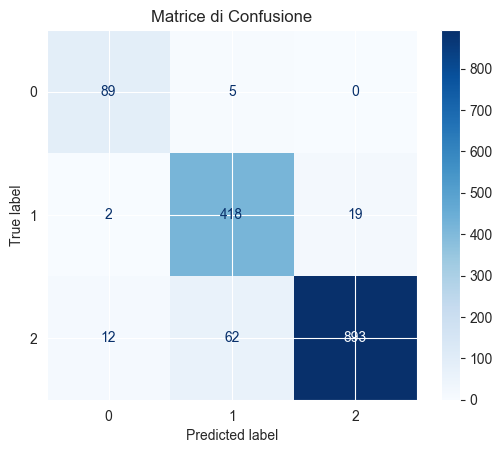

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 4. Addestra il modello sui dati bilanciati
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# 5. Calcola la training accuracy
y_train_pred = model.predict(X_resampled)
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print(f"✅ Training Accuracy: {train_accuracy:.4f}")

# 6. Calcola la test accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

# 7. Report completo
print("\n📊 Classification Report:")
print(classification_report(y_test, y_test_pred))

# 8. Matrice di confusione
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matrice di Confusione")
plt.show()


Traffic_Condition         1.000000
Congestion_Index          0.544620
Vehicle_Count             0.485378
Emission_Levels_g_km      0.026593
Longitude                 0.016715
Time_of_Day               0.011966
Latitude                  0.000099
Traffic_Light_State      -0.000821
Weather_Condition        -0.010655
Energy_Consumption_L_h   -0.019299
Traffic_Speed_kmh        -0.292465
Name: Traffic_Condition, dtype: float64


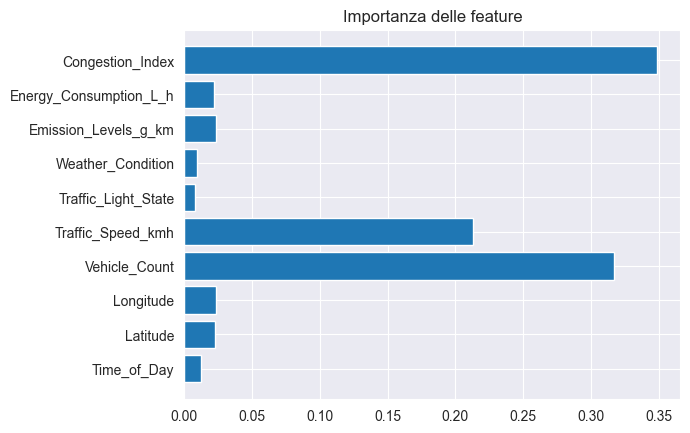

In [213]:
import matplotlib.pyplot as plt
# 1. Guarda la correlazione come filtro iniziale
corr = dataset.corr(numeric_only=True)
print(corr['Traffic_Condition'].sort_values(ascending=False))

# 2. Poi usa feature importance (RandomForest o GradientBoosting)
importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Importanza delle feature")
plt.show()


Feature selezionate con RFE: ['Vehicle_Count', 'Traffic_Speed_kmh', 'Congestion_Index']
Training Accuracy: 0.9997
Test Accuracy: 0.9460

Classification Report Test:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        94
           1       0.89      0.97      0.92       439
           2       0.99      0.93      0.96       967

    accuracy                           0.95      1500
   macro avg       0.92      0.96      0.94      1500
weighted avg       0.95      0.95      0.95      1500



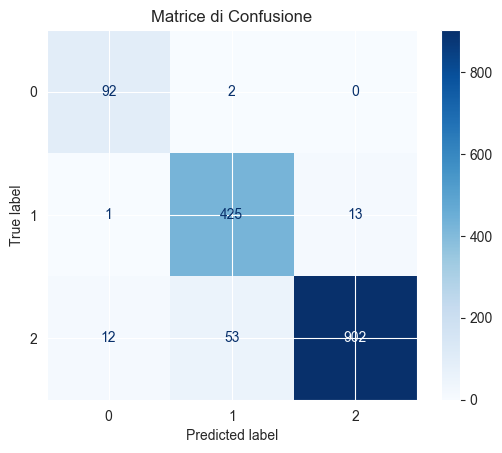

In [214]:
from sklearn.feature_selection import RFE

# 1. Definisci X e y (tutte le feature)
X = dataset.drop("Traffic_Condition", axis=1)
y = dataset["Traffic_Condition"]

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Applica SMOTE solo al training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 4. Definisci il modello per RFE
model = RandomForestClassifier(random_state=42)

# 5. Esegui RFE per selezionare le top 3 feature
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_resampled, y_resampled)

# 6. Ottieni le feature selezionate
selected_features = X.columns[rfe.support_].tolist()
print("Feature selezionate con RFE:", selected_features)

# 7. Allena il modello con solo le feature selezionate
X_resampled_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_resampled_selected, y_resampled)

# 8. Valutazione
y_train_pred = model.predict(X_resampled_selected)
y_test_pred = model.predict(X_test_selected)

print(f"Training Accuracy: {accuracy_score(y_resampled, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report Test:")
print(classification_report(y_test, y_test_pred))

# 9. Matrice di confusione
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matrice di Confusione")
plt.show()


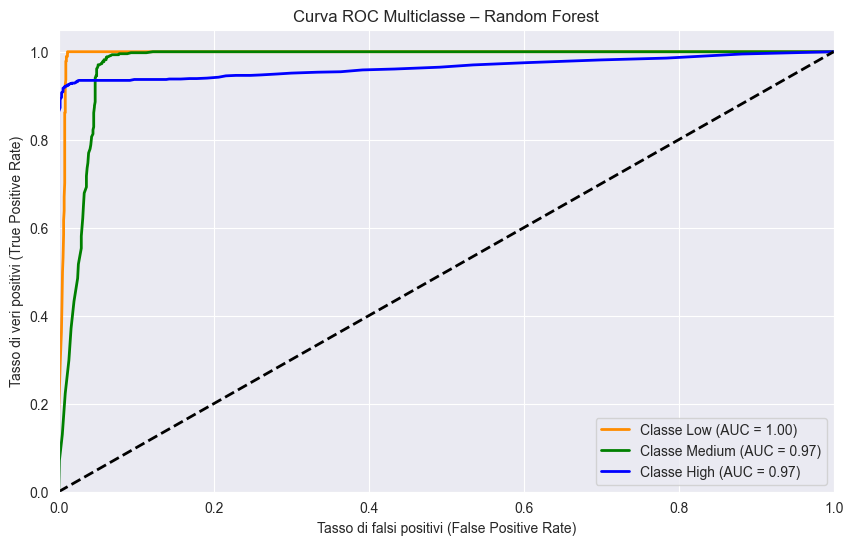

In [215]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Binarizzazione delle etichette del test set
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Predizione delle probabilità sul test set (usando solo le feature selezionate)
y_score = model.predict_proba(X_test_selected)

# Calcolo curve ROC e AUC per ogni classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colori e nomi classi
colors = cycle(['darkorange', 'green', 'blue'])
class_names = ['Low', 'Medium', 'High']

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di falsi positivi (False Positive Rate)')
plt.ylabel('Tasso di veri positivi (True Positive Rate)')
plt.title('Curva ROC Multiclasse – Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [216]:
#from sklearn.model_selection import RandomizedSearchCV

# Parametri da ottimizzare
#param_grid = {
    #'n_estimators': [100, 200, 300],          # numero di alberi
   # 'max_depth': [10, 20, 30, None],          # profondità massima
    #'min_samples_split': [2, 5, 10],          # minimi campioni per split
   # 'min_samples_leaf': [1, 2, 4],            # minimi campioni in foglia
    #}

#grid_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_resampled, y_resampled)

#print("Migliori parametri:", grid_search.best_params_)
#print("Score migliore:", grid_search.best_score_)

Training Accuracy: 0.9883
Test Accuracy: 0.9473

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        94
           1       0.89      0.97      0.93       439
           2       0.99      0.93      0.96       967

    accuracy                           0.95      1500
   macro avg       0.92      0.96      0.94      1500
weighted avg       0.95      0.95      0.95      1500



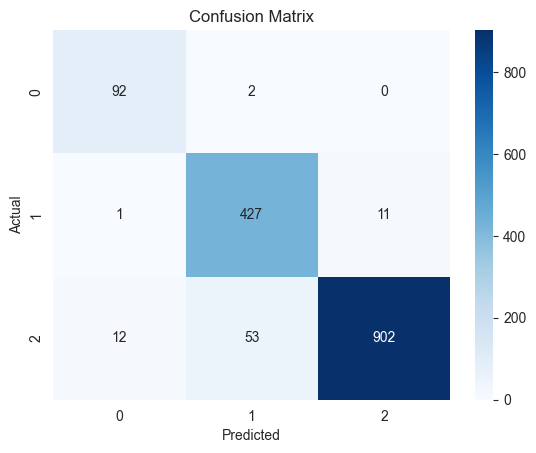

Cross-Validation Accuracy: 0.9627 (+/- 0.0124)


In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Modello Random Forest ottimizzato per evitare overfitting ---
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# --- Addestramento del modello ---
model.fit(X_resampled_selected, y_resampled)

# --- Predizioni ---
y_train_pred = model.predict(X_resampled_selected)
y_test_pred = model.predict(X_test_selected)

# --- Accuracy ---
print(f"Training Accuracy: {accuracy_score(y_resampled, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# --- Classification Report ---
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# --- Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Cross-Validation per valutare la generalizzazione ---
cv_scores = cross_val_score(model, X_resampled_selected, y_resampled, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Feature selezionate: ['Traffic_Speed_kmh', 'Congestion_Index', 'Vehicle_Count']
Train Accuracy: 1.0000
Test Accuracy: 0.9487
Cross-Validation Accuracy: 0.9452

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       108
           1       0.91      0.96      0.94       442
           2       0.99      0.94      0.96       950

    accuracy                           0.95      1500
   macro avg       0.91      0.96      0.93      1500
weighted avg       0.95      0.95      0.95      1500



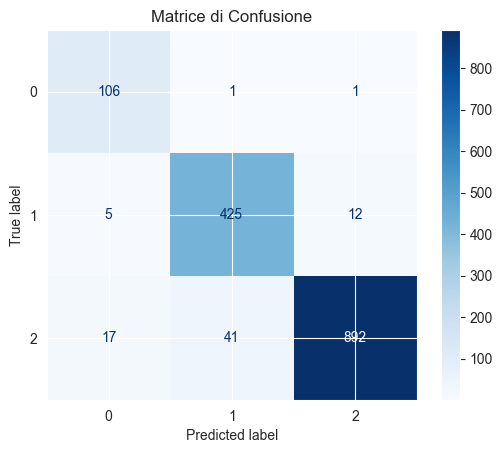

AUC-ROC (multiclasse, OVR): 0.2824


In [219]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# 1. Separazione variabili
X = dataset.drop("Traffic_Condition", axis=1)
y = dataset["Traffic_Condition"]

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Correlazione con il target
correlation = dataset.corr(numeric_only=True)["Traffic_Condition"].abs()
corr_selected = correlation[correlation >= 0.25].index.drop("Traffic_Condition")

# 4. Feature importance
model_temp = RandomForestClassifier(random_state=42)
model_temp.fit(X_train, y_train)
importances = model_temp.feature_importances_
importance_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
top5_important = importance_series.head(3).index

# 5. Unione feature selezionate
selected_features = list(set(corr_selected).union(set(top5_important)))
print("Feature selezionate:", selected_features)

# 6. Nuovi dataset con feature selezionate
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# 7. Training modello finale
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sel, y_train)

# 8. Predizione
y_train_pred = model.predict(X_train_sel)
y_test_pred = model.predict(X_test_sel)

# 9. Valutazione
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

cv_score = cross_val_score(model, X[selected_features], y, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy: {cv_score.mean():.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# 10. Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matrice di Confusione")
plt.show()

# 11. AUC-ROC Multiclasse
# Binarizza il target per multiclass AUC
from sklearn.preprocessing import label_binarize
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test_sel)

auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print(f"AUC-ROC (multiclasse, OVR): {auc_score:.4f}")


Train Accuracy: 1.0000
Test Accuracy: 0.9167
Cross-Validation Accuracy: 0.9062

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       108
           1       0.90      0.89      0.89       442
           2       0.94      0.94      0.94       950

    accuracy                           0.92      1500
   macro avg       0.88      0.89      0.88      1500
weighted avg       0.92      0.92      0.92      1500



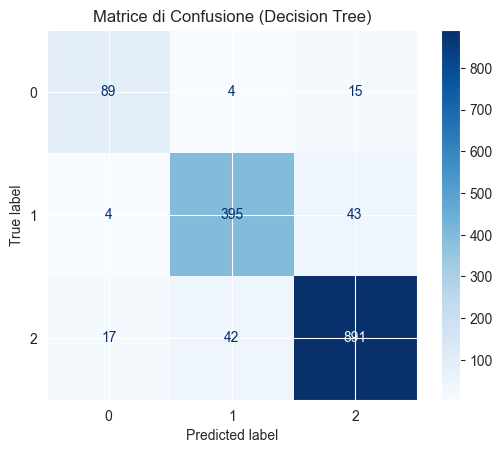

AUC-ROC (Multiclasse): 0.9153


In [220]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# 1. Definisci X e y
X = dataset.drop("Traffic_Condition", axis=1)
y = dataset["Traffic_Condition"]

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Calcola correlazione
correlation = dataset.corr(numeric_only=True)["Traffic_Condition"].abs()
corr_selected = correlation[correlation >= 0.25].index.drop("Traffic_Condition")

# 4. Feature importance (temporanea con albero base)
model_temp = DecisionTreeClassifier(random_state=42)
model_temp.fit(X_train, y_train)
importances = pd.Series(model_temp.feature_importances_, index=X.columns).sort_values(ascending=False)
top5_important = importances.head(5).index

# 5. Selezione finale delle feature
selected_features = list(set(corr_selected).union(set(top5_important)))
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# 6. Modello Decision Tree semplificato
model = DecisionTreeClassifier(
    #max_depth=5,             # 🔽 limite profondità per evitare overfitting
    #min_samples_leaf=10,     # 🔼 evita rami troppo piccoli
    #random_state=42
)
model.fit(X_train_sel, y_train)

# 7. Predizioni
y_train_pred = model.predict(X_train_sel)
y_test_pred = model.predict(X_test_sel)

# 8. Valutazione
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
cv_score = cross_val_score(model, X[selected_features], y, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy: {cv_score.mean():.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# 9. Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap="Blues")
plt.title("Matrice di Confusione (Decision Tree)")
plt.show()

# 10. AUC-ROC multiclasse
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = model.predict_proba(X_test_sel)
auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print(f"AUC-ROC (Multiclasse): {auc:.4f}")


In [221]:
dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,Congestion_Index
0,3,40.842275,-73.703149,0.674740,0.598584,2,0,450.760055,19.574337,2,0.754243
1,3,40.831119,-73.987354,0.664360,0.231765,0,0,321.800341,5.385554,2,0.504586
2,3,40.819549,-73.732462,0.837370,0.558531,0,2,231.152655,10.277477,2,0.820093
3,3,40.725849,-73.980134,0.093426,0.009704,1,1,410.384292,29.243279,2,0.221985
4,3,40.813265,-73.961631,0.186851,0.751322,1,3,364.466342,16.801459,0,0.156801



🔍 Decision Tree
Train Accuracy: 0.8894
Test Accuracy: 0.8933
AUC-ROC (multiclass): 0.9632
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.95      0.72       108
           1       0.84      0.86      0.85       442
           2       0.99      0.90      0.94       950

    accuracy                           0.89      1500
   macro avg       0.80      0.90      0.84      1500
weighted avg       0.91      0.89      0.90      1500



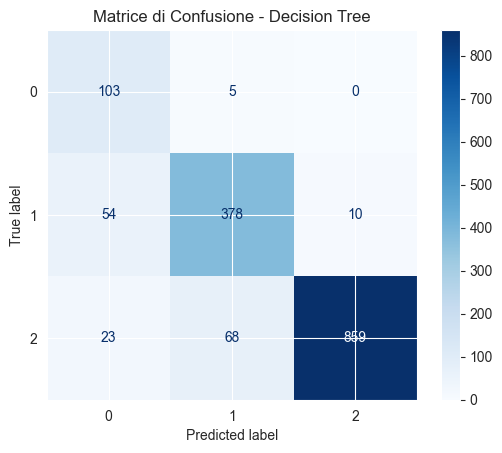


🔍 Random Forest
Train Accuracy: 0.9089
Test Accuracy: 0.9113
AUC-ROC (multiclass): 0.9763
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       108
           1       0.82      0.93      0.87       442
           2       0.97      0.92      0.94       950

    accuracy                           0.91      1500
   macro avg       0.88      0.87      0.88      1500
weighted avg       0.92      0.91      0.91      1500



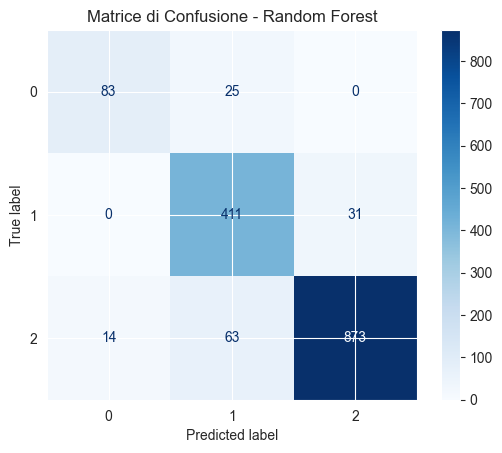


🔍 Logistic Regression
Train Accuracy: 0.7323
Test Accuracy: 0.7440
AUC-ROC (multiclass): 0.8806
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.63       108
           1       0.60      0.51      0.55       442
           2       0.80      0.87      0.84       950

    accuracy                           0.74      1500
   macro avg       0.70      0.65      0.67      1500
weighted avg       0.73      0.74      0.74      1500



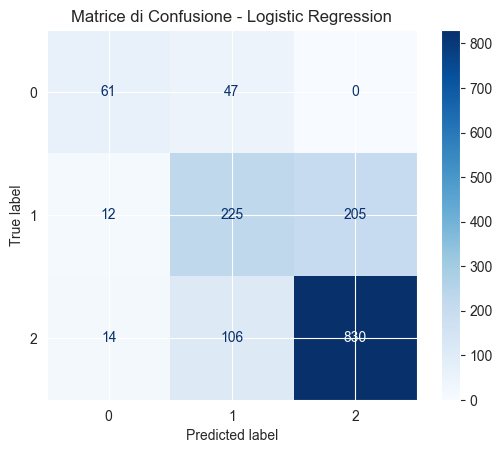


🔍 KNN
Train Accuracy: 0.8611
Test Accuracy: 0.7853
AUC-ROC (multiclass): 0.9014
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       108
           1       0.64      0.70      0.67       442
           2       0.88      0.83      0.86       950

    accuracy                           0.79      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.79      0.79      0.79      1500



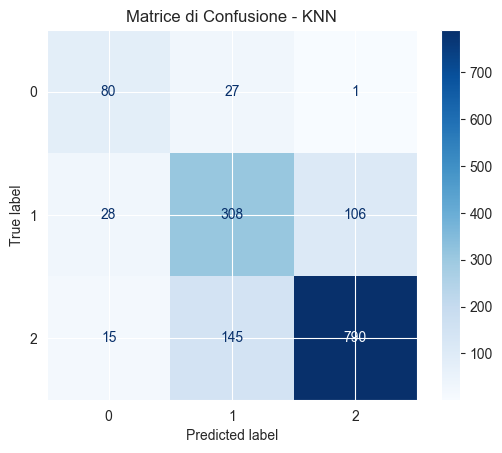


🔍 SVC
Train Accuracy: 0.6331
Test Accuracy: 0.6333
AUC-ROC (multiclass): 0.8808
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.00      0.00      0.00       442
           2       0.63      1.00      0.78       950

    accuracy                           0.63      1500
   macro avg       0.21      0.33      0.26      1500
weighted avg       0.40      0.63      0.49      1500



C:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

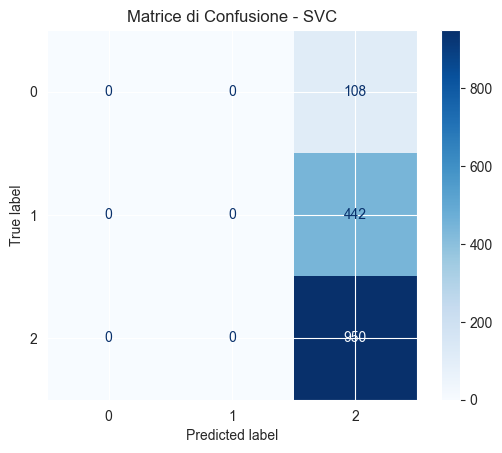


🔍 Gradient Boosting
Train Accuracy: 0.9620
Test Accuracy: 0.9427
AUC-ROC (multiclass): 0.9798
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       108
           1       0.90      0.95      0.92       442
           2       0.98      0.94      0.96       950

    accuracy                           0.94      1500
   macro avg       0.90      0.95      0.92      1500
weighted avg       0.95      0.94      0.94      1500



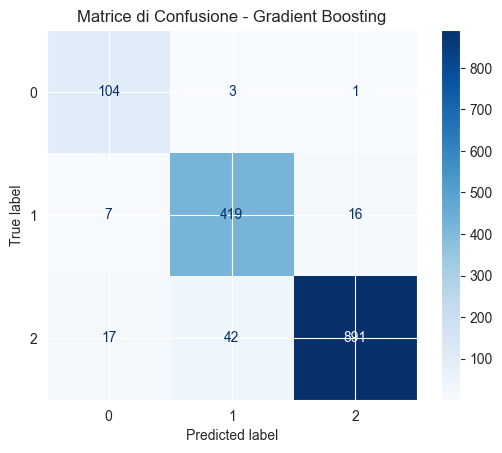

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score
)
from sklearn.pipeline import Pipeline
from sklearn.base import clone

# Classificatori
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Dataset
X = dataset.drop("Traffic_Condition", axis=1)
y = dataset["Traffic_Condition"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Selezione delle feature: correlazione + feature importance (con DT temporaneo)
correlation = dataset.corr(numeric_only=True)["Traffic_Condition"].abs()
corr_selected = correlation[correlation >= 0.25].index.drop("Traffic_Condition")

temp_model = DecisionTreeClassifier(random_state=42)
temp_model.fit(X_train, y_train)
importances = pd.Series(temp_model.feature_importances_, index=X.columns).sort_values(ascending=False)
top5_important = importances.head(5).index

selected_features = list(set(corr_selected).union(set(top5_important)))
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Binarizzazione per AUC-ROC multiclasse
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Classificatori da testare
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVC": SVC(probability=True),  # importante per AUC
    "Gradient Boosting": GradientBoostingClassifier()
}

# Valutazione per ogni classificatore
for name, model in models.items():
    clf = clone(model)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    y_score = clf.predict_proba(X_test_sel)

    acc_train = accuracy_score(y_train, clf.predict(X_train_sel))
    acc_test = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')

    print(f"\n🔍 {name}")
    print(f"Train Accuracy: {acc_train:.4f}")
    print(f"Test Accuracy: {acc_test:.4f}")
    print(f"AUC-ROC (multiclass): {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Matrice di Confusione - {name}")
    plt.show()
